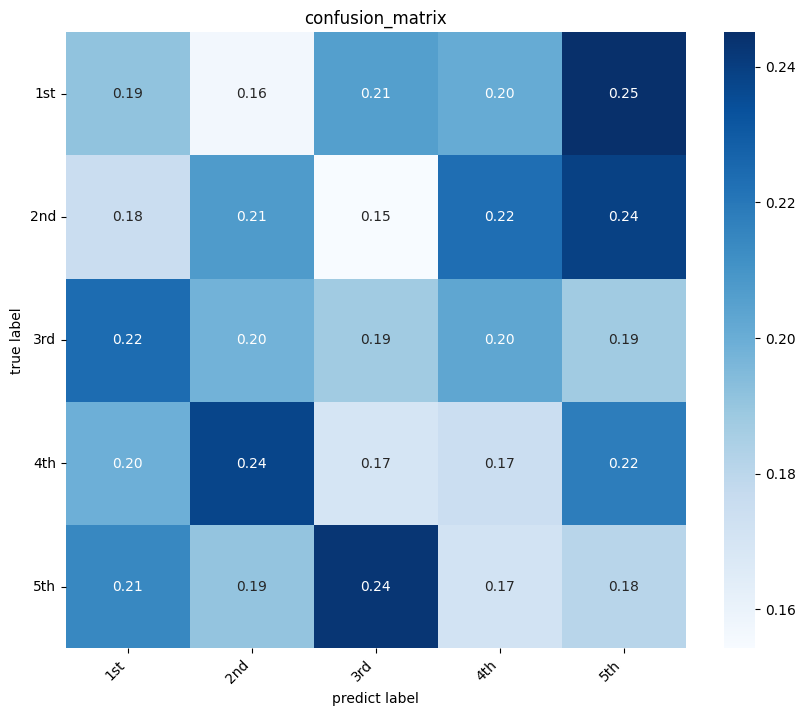

,class,Precision,Recall,F1_Score
0,1st,0.190418,0.191176,0.190797
1,2nd,0.209422,0.207447,0.20843
2,3rd,0.195232,0.1875,0.191288
3,4th,0.179478,0.174757,0.177086
4,5th,0.1689,0.180952,0.174719
5,Average,0.157242,0.156972,0.157053


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
import random

# %%
true = random.choices(['1st','2nd','3rd','4th','5th'], k= 1000)
pred = random.choices(['1st','2nd','3rd','4th','5th'], k= 1000)

# %%
from sklearn.metrics import confusion_matrix
label = ['1st','2nd','3rd','4th','5th']  #設定confusion的分類label
conf_mat = confusion_matrix(true, pred, labels = label )
conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

df_cm = pd.DataFrame(conf_mat, index=label, columns=label)
plt.figure(figsize=(10,8))

heatmap = sns.heatmap(conf_mat,annot=True, fmt='0.2f', cmap='Blues', xticklabels = label,yticklabels = label)
# heatmap = sns.heatmap(conf_mat, vmin = 0.0,vmax = 0.7,annot=True, fmt='0.3f', cmap='Blues', xticklabels = label,yticklabels = label)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel("true label")
plt.xlabel("predict label")
plt.title("confusion_matrix")
plt.show()

# %%
result = []
for i in range(df_cm.shape[0]):
    TP = df_cm.iloc[i,i]
    FP = df_cm.iloc[:,i].sum()-TP
    FN = df_cm.iloc[i,:].sum()-TP
    TN = df_cm.sum().sum()-TP-FP-FN
    # Accuracy = (TP+TN)/(df_cm.sum().sum())
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1_Score = (2 * Precision * Recall)/(Precision + Recall)
    # result = np.concatenate((df_cm.index[i],'Precision:',Precision,'Recall:',Recall,'F1_Score:',F1_Score),axis = 1)
    # result.append([df_cm.index[i],'Precision ',Precision,'Recall ',Recall,'F1_Score ',F1_Score])
    result.append([df_cm.index[i],Precision,Recall,F1_Score])
mn = pd.DataFrame(result,columns= ['class','Precision','Recall','F1_Score'])
kk = pd.DataFrame(['Average', mn['Precision'].sum()/6, mn['Recall'].sum()/6 , mn['F1_Score'].sum()/6 ]).T
pd.DataFrame(np.concatenate((mn,kk),axis = 0),columns = ['class','Precision','Recall','F1_Score'])